# 🎵 Music & Mental Health Survey - Exploratory Data Analysis

This notebook provides a comprehensive exploration of the MXMH (Music x Mental Health) survey dataset to understand patterns between music listening habits and mental health conditions.

## 📋 Objectives
1. **Data Overview**: Load and examine the structure of the MXMH survey dataset
2. **Statistical Analysis**: Generate descriptive statistics and identify data quality issues
3. **Mental Health Insights**: Analyze the distribution of anxiety, depression, insomnia, and OCD levels
4. **Music Preferences**: Explore favorite genres and listening frequency patterns
5. **Correlation Analysis**: Identify relationships between music habits and mental health outcomes
6. **Demographics**: Understand survey respondent characteristics
7. **Music Effects**: Analyze reported effects of music on mental wellbeing

---

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📊 Data Loading and Initial Exploration

In [2]:
# Load the MXMH survey dataset
data_path = '../data/raw/mxmh_survey_results.csv'
df = pd.read_csv(data_path)

print(f"📋 Dataset Shape: {df.shape}")
print(f"👥 Number of survey responses: {len(df)}")
print(f"📊 Number of features: {df.shape[1]}")
print(f"🎵 Survey focus: Music listening habits and mental health indicators")

# Display first few rows
print("\n🔍 First 3 rows of the dataset:")
print(f"\n Data has been collected from {df['Timestamp'].min()} to {df['Timestamp'].max()}, so in days it is { (pd.to_datetime(df['Timestamp']).max() - pd.to_datetime(df['Timestamp']).min()).days } days.")
print(df.head(3).to_string())


📋 Dataset Shape: (736, 33)
👥 Number of survey responses: 736
📊 Number of features: 33
🎵 Survey focus: Music listening habits and mental health indicators

🔍 First 3 rows of the dataset:

 Data has been collected from 10/11/2022 15:46:46 to 9/9/2022 7:48:44, so in days it is 73 days.
            Timestamp   Age Primary streaming service  Hours per day While working Instrumentalist Composer         Fav genre Exploratory Foreign languages    BPM Frequency [Classical] Frequency [Country]  Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  Frequency [Pop] Frequency [R&B]  Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects    Permissions
0  8/27/2022 19:29:02  18.0                   Spotify            3.0           Yes             Yes      Yes             Latin         Yes               Yes  156.0                Rarely     

In [3]:
# Dataset Info and Data Types
print("📝 DATASET INFORMATION")
print("="*50)
df.info()


📝 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null

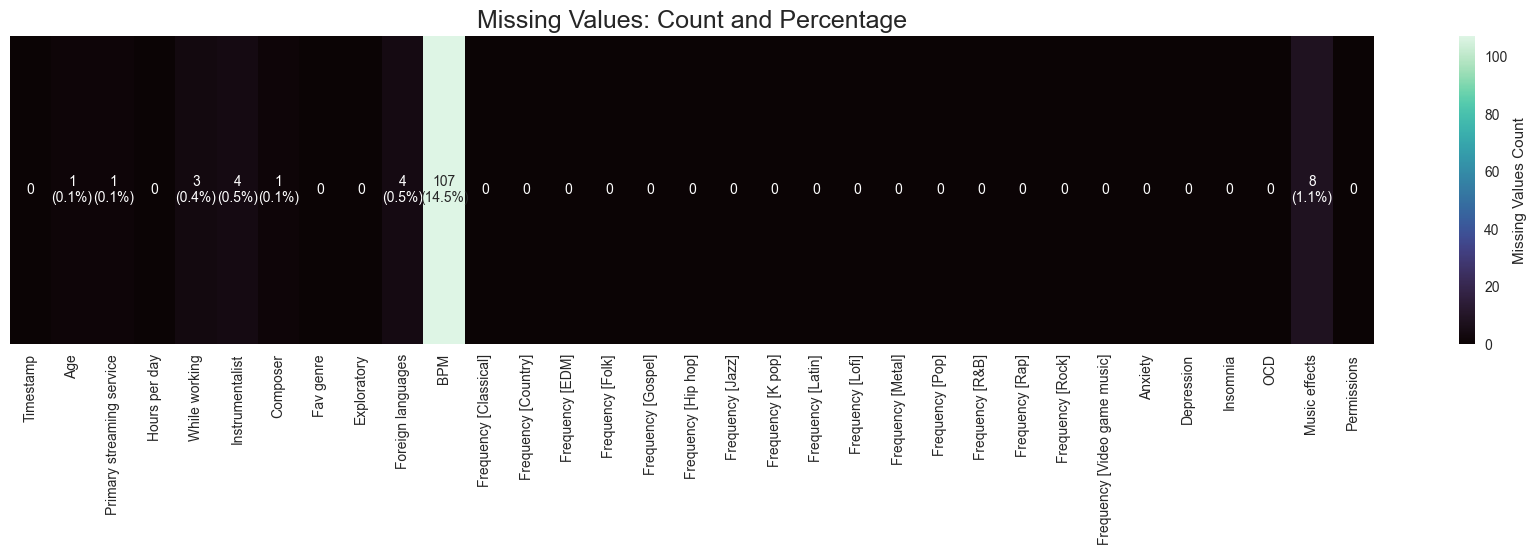

In [4]:
plt.figure(figsize=(22,4))
# Create missing values summary with both count and percentage
missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100

# Create annotations that show both count and percentage
annotations = []
for i, col in enumerate(df.columns):
    count = missing_values[col]
    percent = missing_percent[col]
    if count > 0:
        annotations.append(f'{count}\n({percent:.1f}%)')
    else:
        annotations.append('0')

# Create the heatmap with custom annotations
sns.heatmap(missing_values.to_frame(name='').T, 
           cmap='mako', 
           annot=np.array(annotations).reshape(1, -1),
           fmt='',
           cbar_kws={'label': 'Missing Values Count'}).set_title('Missing Values: Count and Percentage', fontsize=18)
plt.show()

In [5]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))


Number of duplicated rows:  0


In [6]:
# Function to drop rows with missing values in columns that have low missing percentages
def drop_na_below_threshold(dataframe, threshold=2.0):
    """
    Drop rows that have missing values in columns where the missing percentage is below the threshold.
    
    Args:
        dataframe: Input DataFrame
        threshold: Percentage threshold (default 2.0%)
    
    Returns:
        DataFrame with rows dropped where there are missing values in low-missing columns
    """
    # Calculate missing percentages for each column
    missing_percent = (dataframe.isna().sum() / len(dataframe)) * 100
    
    # Find columns with missing percentage below threshold
    cols_below_threshold = missing_percent[missing_percent < threshold].index
    
    print(f"📊 Columns with <{threshold}% missing values:")
    for col in cols_below_threshold:
        print(f"  - {col}: {missing_percent[col]:.2f}% missing")
    
    # Drop rows that have missing values in any of these columns
    if len(cols_below_threshold) > 0:
        # Create a mask for rows with no missing values in the selected columns
        mask = dataframe[cols_below_threshold].notna().all(axis=1)
        cleaned_df = dataframe[mask].copy()
        
        rows_dropped = len(dataframe) - len(cleaned_df)
        print(f"📉 Dropped {rows_dropped} rows with missing values in low-missing columns")
        
        return cleaned_df
    else:
        print("📋 No columns found with missing percentage below threshold")
        return dataframe.copy()

# Apply the function to clean the dataset
print("🧹 CLEANING DATASET - Removing rows with missing values in low-missing columns")
print("="*70)

original_shape = df.shape
df_cleaned = drop_na_below_threshold(df, threshold=2.0)
print(f"\n📊 Dataset shape change: {original_shape} → {df_cleaned.shape}")

# Update the main dataframe
df = df_cleaned

🧹 CLEANING DATASET - Removing rows with missing values in low-missing columns
📊 Columns with <2.0% missing values:
  - Timestamp: 0.00% missing
  - Age: 0.14% missing
  - Primary streaming service: 0.14% missing
  - Hours per day: 0.00% missing
  - While working: 0.41% missing
  - Instrumentalist: 0.54% missing
  - Composer: 0.14% missing
  - Fav genre: 0.00% missing
  - Exploratory: 0.00% missing
  - Foreign languages: 0.54% missing
  - Frequency [Classical]: 0.00% missing
  - Frequency [Country]: 0.00% missing
  - Frequency [EDM]: 0.00% missing
  - Frequency [Folk]: 0.00% missing
  - Frequency [Gospel]: 0.00% missing
  - Frequency [Hip hop]: 0.00% missing
  - Frequency [Jazz]: 0.00% missing
  - Frequency [K pop]: 0.00% missing
  - Frequency [Latin]: 0.00% missing
  - Frequency [Lofi]: 0.00% missing
  - Frequency [Metal]: 0.00% missing
  - Frequency [Pop]: 0.00% missing
  - Frequency [R&B]: 0.00% missing
  - Frequency [Rap]: 0.00% missing
  - Frequency [Rock]: 0.00% missing
  - Freque

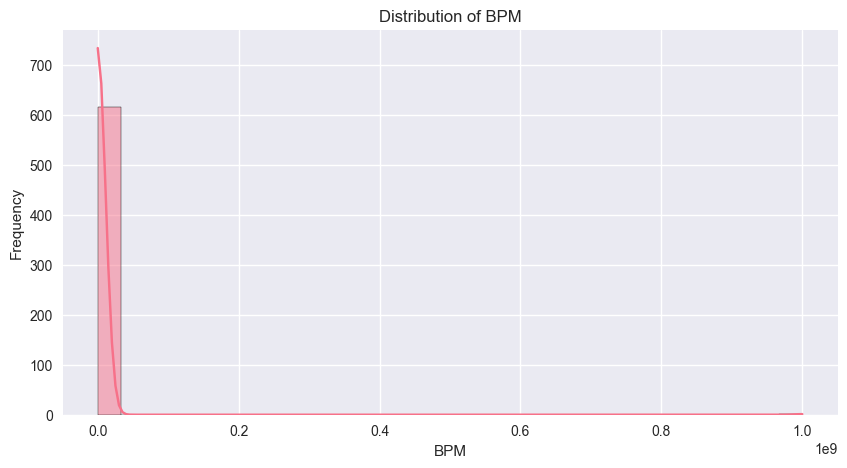

In [7]:
# show me the distribution of the BPM use seaborn
plt.figure(figsize=(10,5)) 
sns.histplot(df['BPM'], bins=30, kde=True)
plt.title('Distribution of BPM')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

In [8]:
df[df['BPM'] > 300]

Timestamp   Age Primary streaming service  Hours per day While working Instrumentalist Composer         Fav genre Exploratory Foreign languages          BPM Frequency [Classical] Frequency [Country]  Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop] Frequency [R&B]  Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects    Permissions
568  9/4/2022 15:41:59  16.0                   Spotify            7.0           Yes              No       No  Video game music         Yes                No  999999999.0                 Never              Rarely        Sometimes           Rarely              Never              Rarely           Rarely             Never             Never            Never   Very frequently       Sometimes           Never  Very frequently           Rarely                    Sometimes      4.0         8.0       8.0  4.0     No effect  I understand.
644  9/13/2022 1:55:43  16.0   Other streaming service            4.0           Yes              No       No               EDM         Yes               Yes        624.0             Sometimes               Never  Very frequently            Never              Never               Never            Never            Rarely             Never            Never             Never           Never           Never            Never            Never                    Sometimes      4.0         7.0       1.0  3.0       Improve  I understand.

In [9]:
df[df['BPM'] < 40]

Timestamp   Age          Primary streaming service  Hours per day While working Instrumentalist Composer Fav genre Exploratory Foreign languages   BPM Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop]  Frequency [R&B]  Frequency [Rap] Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD Music effects    Permissions
339   8/29/2022 8:37:30  35.0                            Spotify            3.0            No             Yes       No      Folk         Yes                No   0.0             Sometimes           Sometimes           Never        Sometimes              Never               Never           Rarely             Never             Never           Rarely             Never          Rarely            Never            Never        Sometimes                    Sometimes      8.0         2.0       2.0  8.0     No effect  I understand.
372  8/29/2022 15:05:22  18.0                            Spotify            2.0           Yes              No       No   Hip hop         Yes               Yes  20.0                Rarely               Never          Rarely            Never             Rarely     Very frequently           Rarely   Very frequently         Sometimes            Never             Never       Sometimes  Very frequently  Very frequently            Never                        Never     10.0         7.0       2.0  0.0       Improve  I understand.
429  8/30/2022 18:15:39  73.0                            Pandora            3.0           Yes              No       No       R&B         Yes               Yes   4.0             Sometimes     Very frequently          Rarely        Sometimes    Very frequently           Sometimes        Sometimes            Rarely   Very frequently            Never            Rarely       Sometimes  Very frequently        Sometimes        Sometimes                        Never      5.0         4.0       0.0  1.0       Improve  I understand.
524    9/2/2022 9:15:48  28.0                            Spotify            3.0            No             Yes      Yes     Metal         Yes               Yes   0.0       Very frequently               Never          Rarely        Sometimes             Rarely              Rarely  Very frequently            Rarely         Sometimes  Very frequently   Very frequently          Rarely        Sometimes            Never  Very frequently              Very frequently      8.0         8.0       5.0  2.0       Improve  I understand.
567   9/4/2022 13:07:45  68.0                            Pandora            1.0           Yes              No       No    Gospel          No                No   8.0       Very frequently               Never           Never        Sometimes    Very frequently               Never            Never             Never         Sometimes            Never             Never           Never            Never            Never            Never                        Never     10.0        10.0      10.0  0.0       Improve  I understand.
639  9/12/2022 22:26:06  30.0  I do not use a streaming service.            0.0            No              No       No     Metal          No                No   0.0                Rarely               Never          Rarely            Never              Never               Never            Never             Never             Never            Never         Sometimes           Never            Never           Rarely           Rarely                       Rarely     10.0        10.0      10.0  9.0       Improve  I understand.

In [10]:
# for the rows missing BPM and the outliers, fill them with the median BPM
median_bpm = df['BPM'].median()
df['BPM'] = df['BPM'].apply(lambda x: median_bpm if (pd.isna(x) or x < 40 or x > 300) else x)

In [11]:
# Check unique values in key columns
print("\n" + "="*50)
print("🎵 KEY CATEGORICAL VARIABLES")
print("="*50)
categorical_cols = ['Primary streaming service', 'Fav genre', 'Music effects']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))


🎵 KEY CATEGORICAL VARIABLES

Primary streaming service:
Primary streaming service
Spotify                              450
YouTube Music                         90
I do not use a streaming service.     69
Apple Music                           50
Other streaming service               49
Pandora                               10
Name: count, dtype: int64

Fav genre:
Fav genre
Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Name: count, dtype: int64

Music effects:
Music effects
Improve      535
No effect    166
Worsen        17
Name: count, dtype: int64


In [12]:
df.describe()[1:].T.style.background_gradient(cmap='mako', axis=1)

In [13]:
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values                                      Unique Values
Age                                                61  [18.0, 61.0, 21.0, 19.0, 17.0, 16.0, 15.0, 14....
Anxiety                                            12  [7.0, 9.0, 8.0, 4.0, 5.0, 2.0, 1.0, 6.0, 10.0,...
BPM                                               129  [132.0, 84.0, 107.0, 86.0, 66.0, 95.0, 94.0, 1...
Composer                                            2                                          [No, Yes]
Depression                                         12  [7.0, 2.0, 8.0, 3.0, 0.0, 1.0, 4.0, 5.0, 9.0, ...
Exploratory                                         2                                          [No, Yes]
Fav genre                                          16  [Video game music, Jazz, R&B, K pop, Rock, Cou...
Foreign languages                                   2                                          [Yes, No]
Frequency [Classical]                               4        [Never, Sometimes, Rarely, Very frequently]
Frequency [Country]                                 4        [Never, Sometimes, Very frequently, Rarely]
Frequency [EDM]                                     4        [Very frequently, Never, Rarely, Sometimes]
Frequency [Folk]                                    4        [Never, Rarely, Sometimes, Very frequently]
Frequency [Gospel]                                  4        [Never, Sometimes, Rarely, Very frequently]
Frequency [Hip hop]                                 4        [Rarely, Never, Very frequently, Sometimes]
Frequency [Jazz]                                    4        [Rarely, Very frequently, Never, Sometimes]
Frequency [K pop]                                   4        [Very frequently, Sometimes, Never, Rarely]
Frequency [Latin]                                   4        [Never, Very frequently, Sometimes, Rarely]
Frequency [Lofi]                                    4        [Sometimes, Very frequently, Rarely, Never]
Frequency [Metal]                                   4        [Sometimes, Never, Rarely, Very frequently]
Frequency [Pop]                                     4        [Rarely, Sometimes, Very frequently, Never]
Frequency [R&B]                                     4        [Never, Sometimes, Very frequently, Rarely]
Frequency [Rap]                                     4        [Rarely, Never, Very frequently, Sometimes]
Frequency [Rock]                                    4        [Rarely, Never, Very frequently, Sometimes]
Frequency [Video game music]                        4        [Very frequently, Never, Rarely, Sometimes]
Hours per day                                      26  [4.0, 2.5, 5.0, 3.0, 1.0, 6.0, 8.0, 2.0, 12.0,...
Insomnia                                           12  [10.0, 3.0, 5.0, 7.0, 6.0, 0.0, 4.0, 2.0, 8.0,...
Instrumentalist                                     2                                          [No, Yes]
Music effects                                       3                       [No effect, Improve, Worsen]
OCD                                                13  [2.0, 3.0, 9.0, 7.0, 0.0, 1.0, 4.0, 6.0, 10.0,...
Permissions                                         1                                    [I understand.]
Primary streaming service                           6  [Spotify, YouTube Music, I do not use a stream...
Timestamp                                         717  [8/27/2022 21:28:18, 8/27/2022 21:40:40, 8/27/...
While working                                       2                                          [No, Yes]

In [14]:
from ydata_profiling import ProfileReport

ProfileReport(df, title='Music Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()


100%|██████████| 33/33 [00:00<00:00, 95.27it/s]


In [15]:
df1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
df[df1].corr().T.style.background_gradient(cmap='mako', axis=1)

## 🔗 Correlation Analysis: Music Habits vs Mental Health

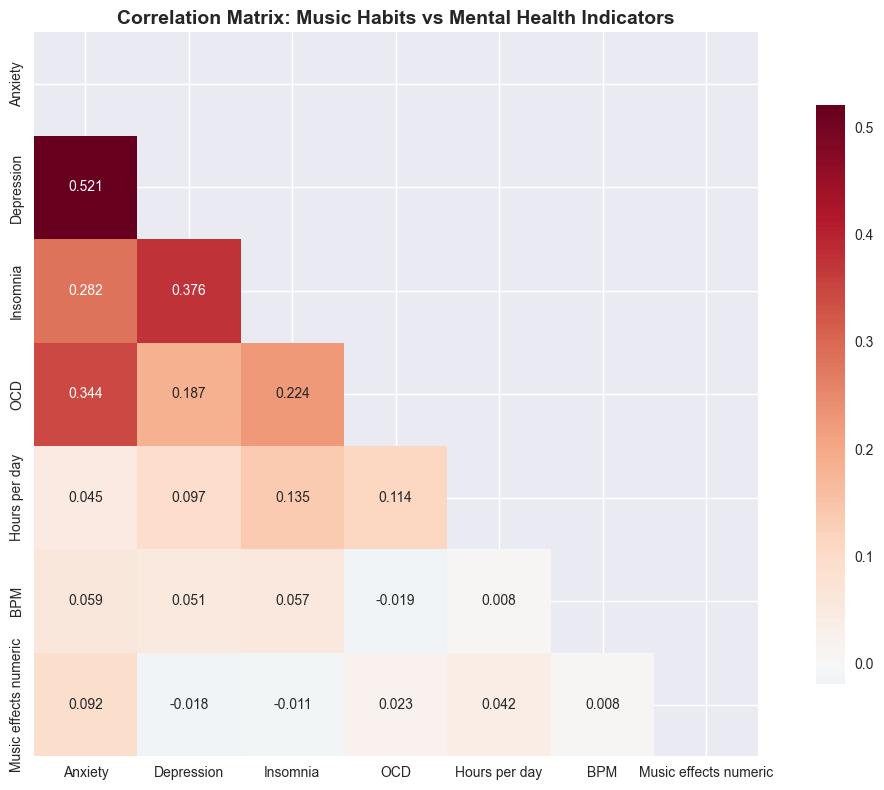

🎵 MUSIC EFFECTS ON MENTAL HEALTH
Overall music effects reported:
Music effects
Improve      535
No effect    166
Worsen        17
Name: count, dtype: int64


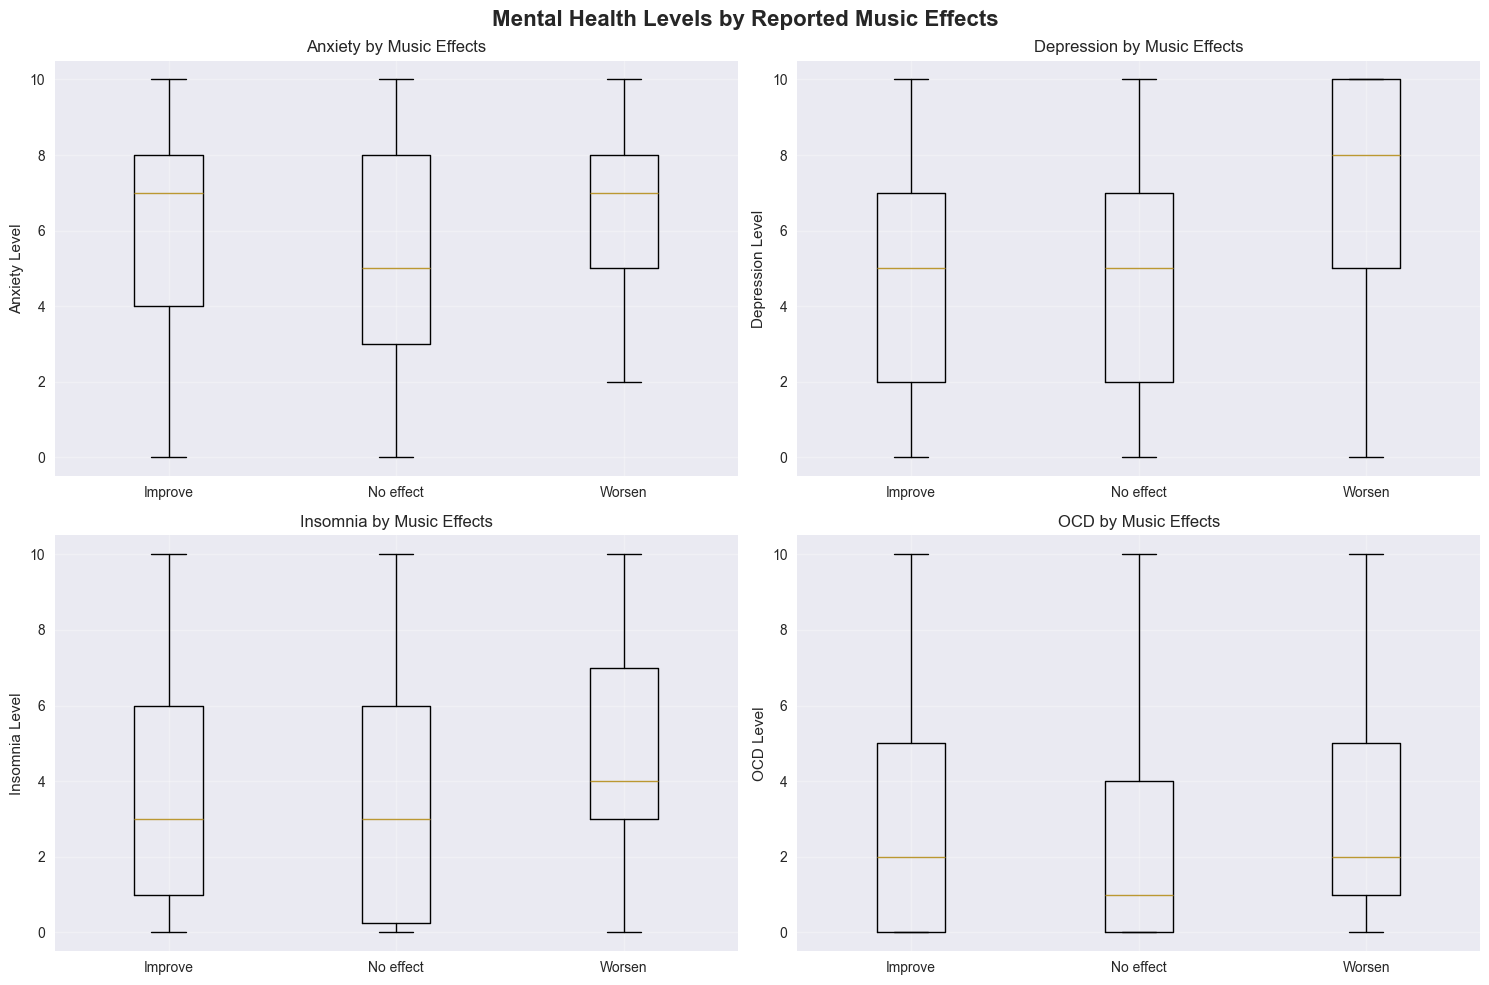

In [16]:
# Correlation analysis between music habits and mental health indicators
mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
music_numerical_cols = ['Hours per day', 'BPM']

# Create a correlation dataset with numerical variables
correlation_data = df[mental_health_cols + music_numerical_cols].copy()

# Convert any categorical music effects to numerical if possible
if 'Music effects' in df.columns:
    # Map music effects to numerical values
    effects_mapping = {
        'Improve': 1,
        'Worsen': -1,
        'No effect': 0
    }
    correlation_data['Music effects numeric'] = df['Music effects'].map(effects_mapping)

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Music Habits vs Mental Health Indicators', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyze relationship between music effects and mental health
if 'Music effects' in df.columns:
    print("🎵 MUSIC EFFECTS ON MENTAL HEALTH")
    print("="*50)
    
    effects_counts = df['Music effects'].value_counts()
    print("Overall music effects reported:")
    print(effects_counts)
    
    # Analyze mental health levels by music effects
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Mental Health Levels by Reported Music Effects', fontsize=16, fontweight='bold')
    
    for i, mh_col in enumerate(mental_health_cols):
        row = i // 2
        col = i % 2
        
        # Create boxplot
        effects_data = []
        effects_labels = []
        for effect in ['Improve', 'No effect', 'Worsen']:
            if effect in df['Music effects'].values:
                effect_data = df[df['Music effects'] == effect][mh_col].dropna()
                if len(effect_data) > 0:
                    effects_data.append(effect_data)
                    effects_labels.append(effect)
        
        if effects_data:
            axes[row, col].boxplot(effects_data, labels=effects_labels)
            axes[row, col].set_title(f'{mh_col} by Music Effects')
            axes[row, col].set_ylabel(f'{mh_col} Level')
            axes[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Does the level of a mental health condition (like Anxiety or Depression) differ significantly depending on how people perceive the effect of music on them?

So, for example:

Do people who said music improves their mental health have lower anxiety than those who said it worsens it?

Or is there no statistical difference?

In [ ]:
# perform the statistical test: kruskal-wallis test to see if there are significant differences in mental health levels perception based on the mental health conditions
from scipy.stats import kruskal

print("📊 STATISTICAL TESTS: Kruskal-Wallis Test on Mental Health Levels by Music Effects")
print("H0: No difference in mental health levels across music effects groups")
for mh_col in mental_health_cols:
    groups = []
    for effect in ['Improve', 'No effect', 'Worsen']:
        group_data = df[df['Music effects'] == effect][mh_col].dropna()
        if len(group_data) > 0:
            groups.append(group_data)
    
    if len(groups) >= 2:
        stat, p_value = kruskal(*groups)
        print(f"\nKruskal-Wallis Test for {mh_col}:")
        print(f"  - Statistic: {stat:.4f}")
        print(f"  - p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  - Result: Significant differences between {mh_col} and the perception of the music effects (reject H0)")
        else:
            print(f"  - Result: No significant differences between {mh_col} and the perception of the music effects (fail to reject H0) ")
    else:
        print(f"\nNot enough groups with data to perform Kruskal-Wallis Test for {mh_col}.")
        

📊 STATISTICAL TESTS: Kruskal-Wallis Test on Mental Health Levels by Music Effects
H0: No difference in mental health levels across music effects groups

Kruskal-Wallis Test for Anxiety:
  - Statistic: 12.8896
  - p-value: 0.0016
  - Result: Significant differences between Anxiety and the perception of the music effects (reject H0)

Kruskal-Wallis Test for Depression:
  - Statistic: 12.3914
  - p-value: 0.0020
  - Result: Significant differences between Depression and the perception of the music effects (reject H0)

Kruskal-Wallis Test for Insomnia:
  - Statistic: 1.9075
  - p-value: 0.3853
  - Result: No significant differences between Insomnia and the perception of the music effects (fail to reject H0)

Kruskal-Wallis Test for OCD:
  - Statistic: 3.0740
  - p-value: 0.2150
  - Result: No significant differences between OCD and the perception of the music effects (fail to reject H0)


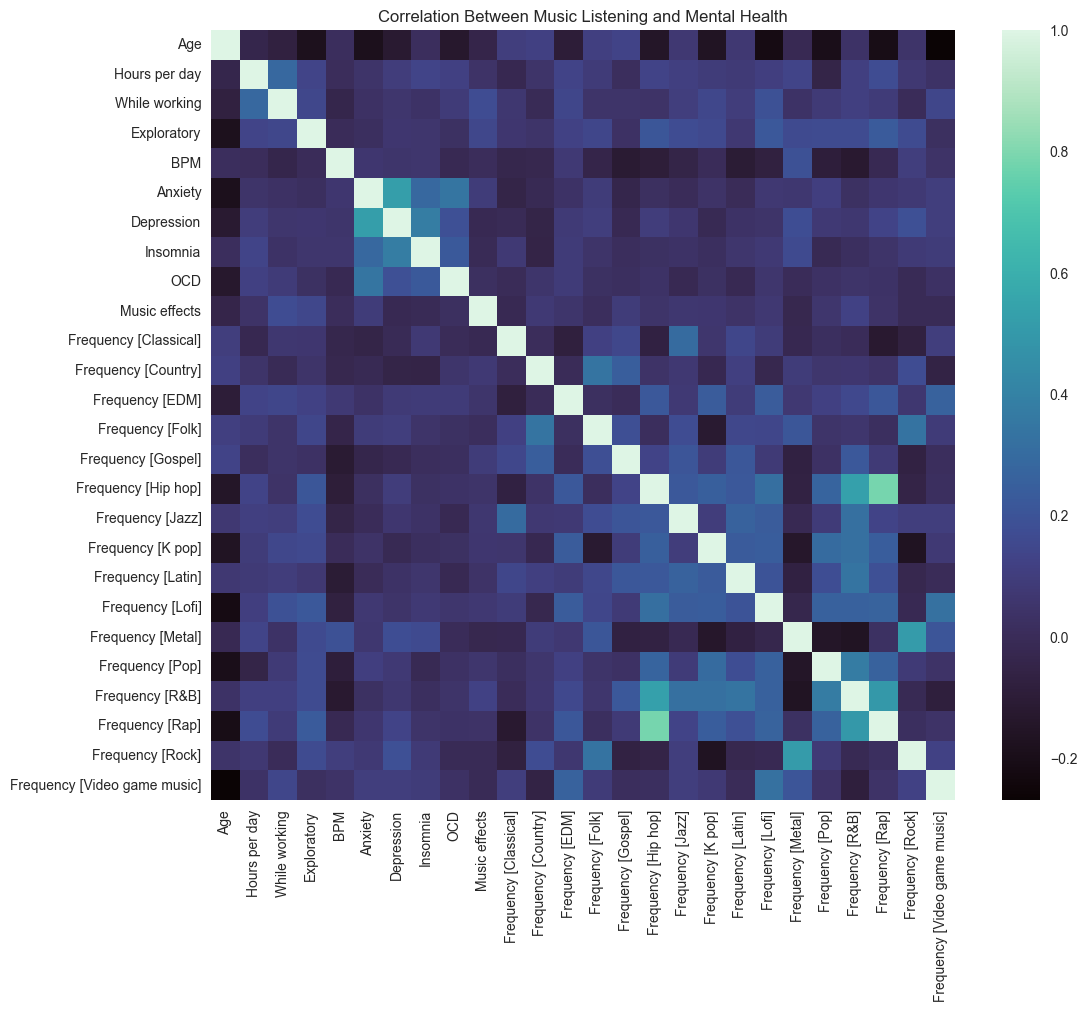

In [17]:
sel = ['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM','Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']
freq = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
df_genre = df[[col for col in df.columns if col.startswith('Frequency')]]
df_genre.replace(freq, inplace=True)
df_sel = pd.concat([df[sel], df_genre], axis=1)
df_sel['While working'] = df_sel['While working'].map({'Yes': 1, 'No': 0})
df_sel['Exploratory'] = df_sel['Exploratory'].map({'Yes': 1, 'No': 0})
df_sel['Music effects'] = df_sel['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})
plt.figure(figsize=(12, 10))
sns.heatmap(df_sel.corr(), annot=False, cmap='mako')
plt.title('Correlation Between Music Listening and Mental Health')
plt.show()

## 👥 Survey Respondent Demographics and Characteristics

👥 SURVEY RESPONDENT DEMOGRAPHICS
Age Statistics:
Mean age: 25.2 years
Age range: 10 - 89 years
Median age: 21.0 years

🎵 MUSIC BACKGROUND CHARACTERISTICS:

While working:
  Yes: 567 (79.0%)
  No: 151 (21.0%)

Instrumentalist:
  No: 489 (68.1%)
  Yes: 229 (31.9%)

Composer:
  No: 594 (82.7%)
  Yes: 124 (17.3%)

Exploratory:
  Yes: 514 (71.6%)
  No: 204 (28.4%)

Foreign languages:
  Yes: 395 (55.0%)
  No: 323 (45.0%)


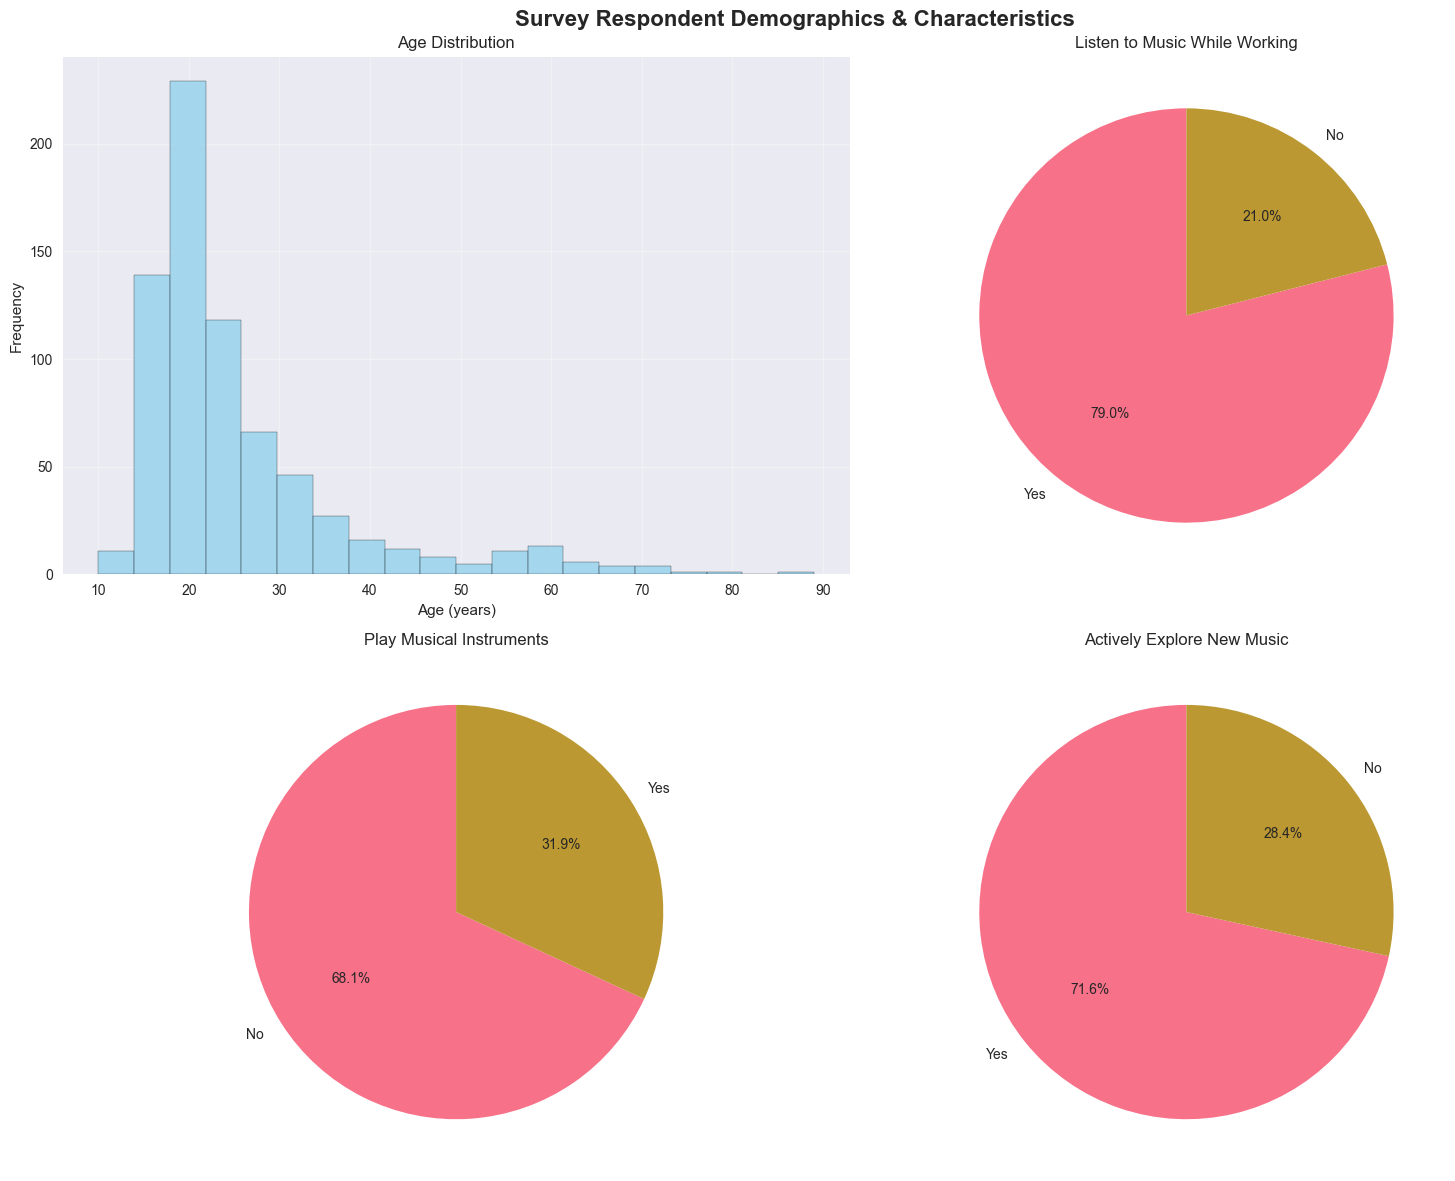

In [18]:
# Survey Respondent Demographics Analysis
print("👥 SURVEY RESPONDENT DEMOGRAPHICS")
print("="*40)

# Age distribution
if 'Age' in df.columns:
    print(f"Age Statistics:")
    age_stats = df['Age'].describe()
    print(f"Mean age: {age_stats['mean']:.1f} years")
    print(f"Age range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
    print(f"Median age: {age_stats['50%']:.1f} years")

# Music background characteristics
music_background_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
available_background_cols = [col for col in music_background_cols if col in df.columns]

if available_background_cols:
    print(f"\n🎵 MUSIC BACKGROUND CHARACTERISTICS:")
    for col in available_background_cols:
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")

# Create demographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Survey Respondent Demographics & Characteristics', fontsize=16, fontweight='bold')

# Age distribution
if 'Age' in df.columns:
    axes[0, 0].hist(df['Age'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Age Distribution')
    axes[0, 0].set_xlabel('Age (years)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# Music while working
if 'While working' in df.columns:
    working_counts = df['While working'].value_counts()
    axes[0, 1].pie(working_counts.values, labels=working_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Listen to Music While Working')

# Instrumentalist distribution
if 'Instrumentalist' in df.columns:
    instrument_counts = df['Instrumentalist'].value_counts()
    axes[1, 0].pie(instrument_counts.values, labels=instrument_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Play Musical Instruments')

# Exploratory listening
if 'Exploratory' in df.columns:
    exploratory_counts = df['Exploratory'].value_counts()
    axes[1, 1].pie(exploratory_counts.values, labels=exploratory_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Actively Explore New Music')

plt.tight_layout()
plt.show()


## 📈 Music Effects on Mental Wellbeing Analysis

📈 MUSIC EFFECTS ON MENTAL WELLBEING
Reported effects of music on mental health:
  Improve: 535 (74.5%)
  No effect: 166 (23.1%)
  Worsen: 17 (2.4%)

🎵 MUSIC EFFECTS BY FAVORITE GENRE
Top genres by percentage reporting 'Improve' effect:
  Gospel              : 100.0%
  Lofi                : 100.0%
  Hip hop             : 88.2%
  EDM                 : 83.3%
  K pop               : 81.0%
  Jazz                : 80.0%
  Folk                : 79.3%
  Country             : 79.2%
  Rap                 : 77.3%
  Metal               : 75.9%

🧠 MUSIC EFFECTS BY MENTAL HEALTH LEVELS

Anxiety levels by music effects:
               mean   std  count
Music effects                   
Improve        6.04  2.65    535
No effect      5.10  3.09    166
Worsen         6.76  2.61     17

Depression levels by music effects:
               mean   std  count
Music effects                   
Improve        4.84  2.91    535
No effect      4.44  3.24    166
Worsen         7.18  3.11     17

Insomnia levels by 

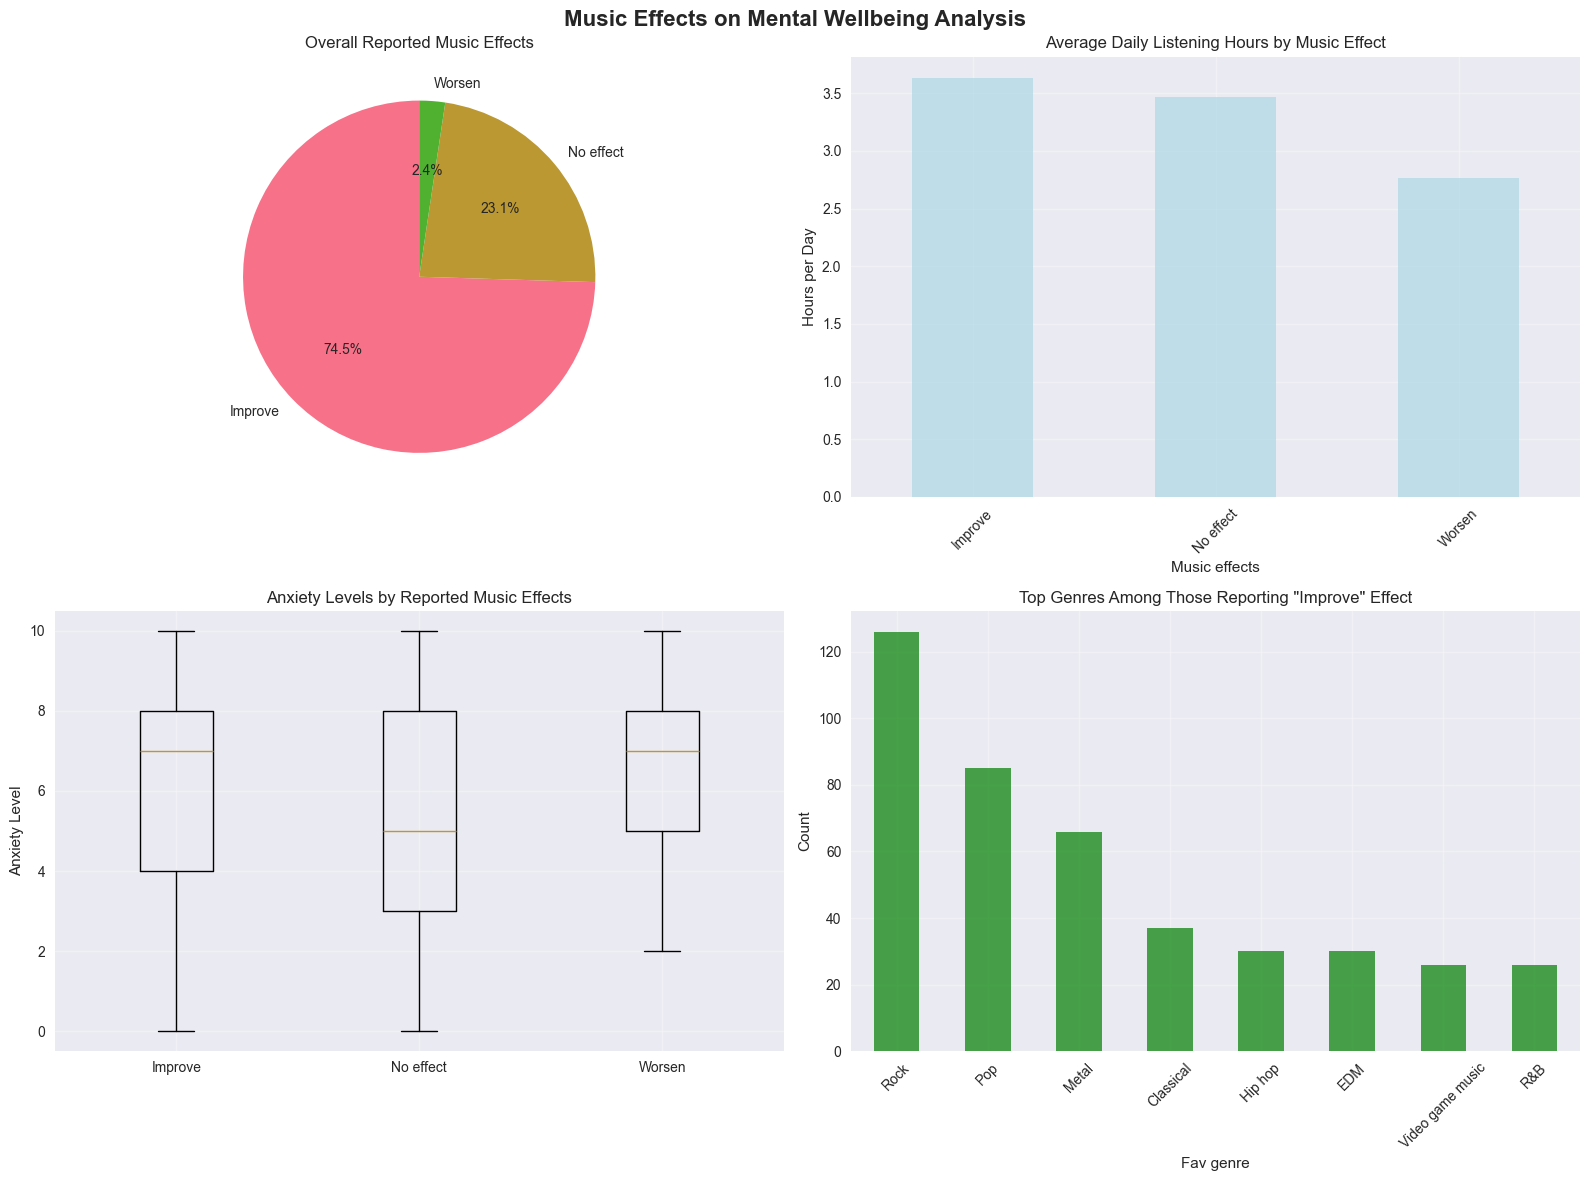


🎼 BPM PREFERENCES BY MENTAL HEALTH

Anxiety - BPM preferences:
                   mean   std  count
Anxiety_category                    
Low               118.9  29.2    171
Moderate          124.9  29.7    315
High              124.4  29.6    232

Depression - BPM preferences:
                      mean   std  count
Depression_category                    
Low                  120.4  28.6    266
Moderate             125.4  31.0    296
High                 124.4  28.5    156

Insomnia - BPM preferences:
                    mean   std  count
Insomnia_category                    
Low                121.8  29.8    379
Moderate           125.8  30.1    233
High               123.4  27.7    106

OCD - BPM preferences:
               mean   std  count
OCD_category                    
Low           123.2  30.1    491
Moderate      123.0  29.9    164
High          124.8  25.6     63


In [19]:
# Music Effects on Mental Wellbeing Analysis
print("📈 MUSIC EFFECTS ON MENTAL WELLBEING")
print("="*50)

# Analyze reported music effects
if 'Music effects' in df.columns:
    effects_counts = df['Music effects'].value_counts()
    effects_percentages = (effects_counts / len(df)) * 100
    
    print("Reported effects of music on mental health:")
    for effect, count in effects_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {effect}: {count} ({percentage:.1f}%)")
    
    # Analyze music effects by favorite genre
    if 'Fav genre' in df.columns:
        print(f"\n🎵 MUSIC EFFECTS BY FAVORITE GENRE")
        print("="*50)
        
        effects_by_genre = pd.crosstab(df['Fav genre'], df['Music effects'], normalize='index') * 100
        effects_by_genre = effects_by_genre.round(1)
        
        # Show genres with highest "Improve" percentage
        if 'Improve' in effects_by_genre.columns:
            improve_genres = effects_by_genre['Improve'].sort_values(ascending=False)
            print("Top genres by percentage reporting 'Improve' effect:")
            for genre, percentage in improve_genres.head(10).items():
                print(f"  {genre:20}: {percentage:.1f}%")
    
    # Analyze music effects by mental health levels
    print(f"\n🧠 MUSIC EFFECTS BY MENTAL HEALTH LEVELS")
    print("="*50)
    
    mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
    
    for mh_col in mental_health_cols:
        if mh_col in df.columns:
            print(f"\n{mh_col} levels by music effects:")
            effects_mh = df.groupby('Music effects')[mh_col].agg(['mean', 'std', 'count']).round(2)
            print(effects_mh)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Music Effects on Mental Wellbeing Analysis', fontsize=16, fontweight='bold')
    
    # Overall music effects distribution
    effects_counts.plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Overall Reported Music Effects')
    axes[0, 0].set_ylabel('')
    
    # Music effects by listening hours
    if 'Hours per day' in df.columns:
        effects_hours = df.groupby('Music effects')['Hours per day'].mean()
        effects_hours.plot(kind='bar', ax=axes[0, 1], color='lightblue', alpha=0.7)
        axes[0, 1].set_title('Average Daily Listening Hours by Music Effect')
        axes[0, 1].set_ylabel('Hours per Day')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3)
    
    # Mental health scores by music effects (using Anxiety as example)
    if 'Anxiety' in df.columns:
        anxiety_by_effects = []
        effect_labels = []
        for effect in ['Improve', 'No effect', 'Worsen']:
            if effect in df['Music effects'].values:
                anxiety_data = df[df['Music effects'] == effect]['Anxiety'].dropna()
                if len(anxiety_data) > 0:
                    anxiety_by_effects.append(anxiety_data)
                    effect_labels.append(effect)
        
        if anxiety_by_effects:
            axes[1, 0].boxplot(anxiety_by_effects, labels=effect_labels)
            axes[1, 0].set_title('Anxiety Levels by Reported Music Effects')
            axes[1, 0].set_ylabel('Anxiety Level')
            axes[1, 0].grid(True, alpha=0.3)
    
    # Genre distribution for those reporting "Improve" effect
    if 'Improve' in df['Music effects'].values and 'Fav genre' in df.columns:
        improve_df = df[df['Music effects'] == 'Improve']
        improve_genres = improve_df['Fav genre'].value_counts().head(8)
        
        improve_genres.plot(kind='bar', ax=axes[1, 1], color='green', alpha=0.7)
        axes[1, 1].set_title('Top Genres Among Those Reporting "Improve" Effect')
        axes[1, 1].set_ylabel('Count')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Analyze BPM preferences by mental health levels
if 'BPM' in df.columns:
    print(f"\n🎼 BPM PREFERENCES BY MENTAL HEALTH")
    print("="*50)
    
    for mh_col in mental_health_cols:
        if mh_col in df.columns:
            # Create mental health categories for analysis
            df[f'{mh_col}_category'] = pd.cut(df[mh_col], 
                                            bins=[0, 3, 7, 10], 
                                            labels=['Low', 'Moderate', 'High'],
                                            include_lowest=True)
            
            bpm_by_category = df.groupby(f'{mh_col}_category')['BPM'].agg(['mean', 'std', 'count']).round(1)
            print(f"\n{mh_col} - BPM preferences:")
            print(bpm_by_category)

## 🎵 Streaming Platform Usage Analysis

📱 STREAMING PLATFORM USAGE ANALYSIS
Available streaming platforms:
  - Classical
  - Country
  - EDM
  - Folk
  - Gospel
  - Hip hop
  - Jazz
  - K pop
  - Latin
  - Lofi
  - Metal
  - Pop
  - R&B
  - Rap
  - Rock
  - Video game music


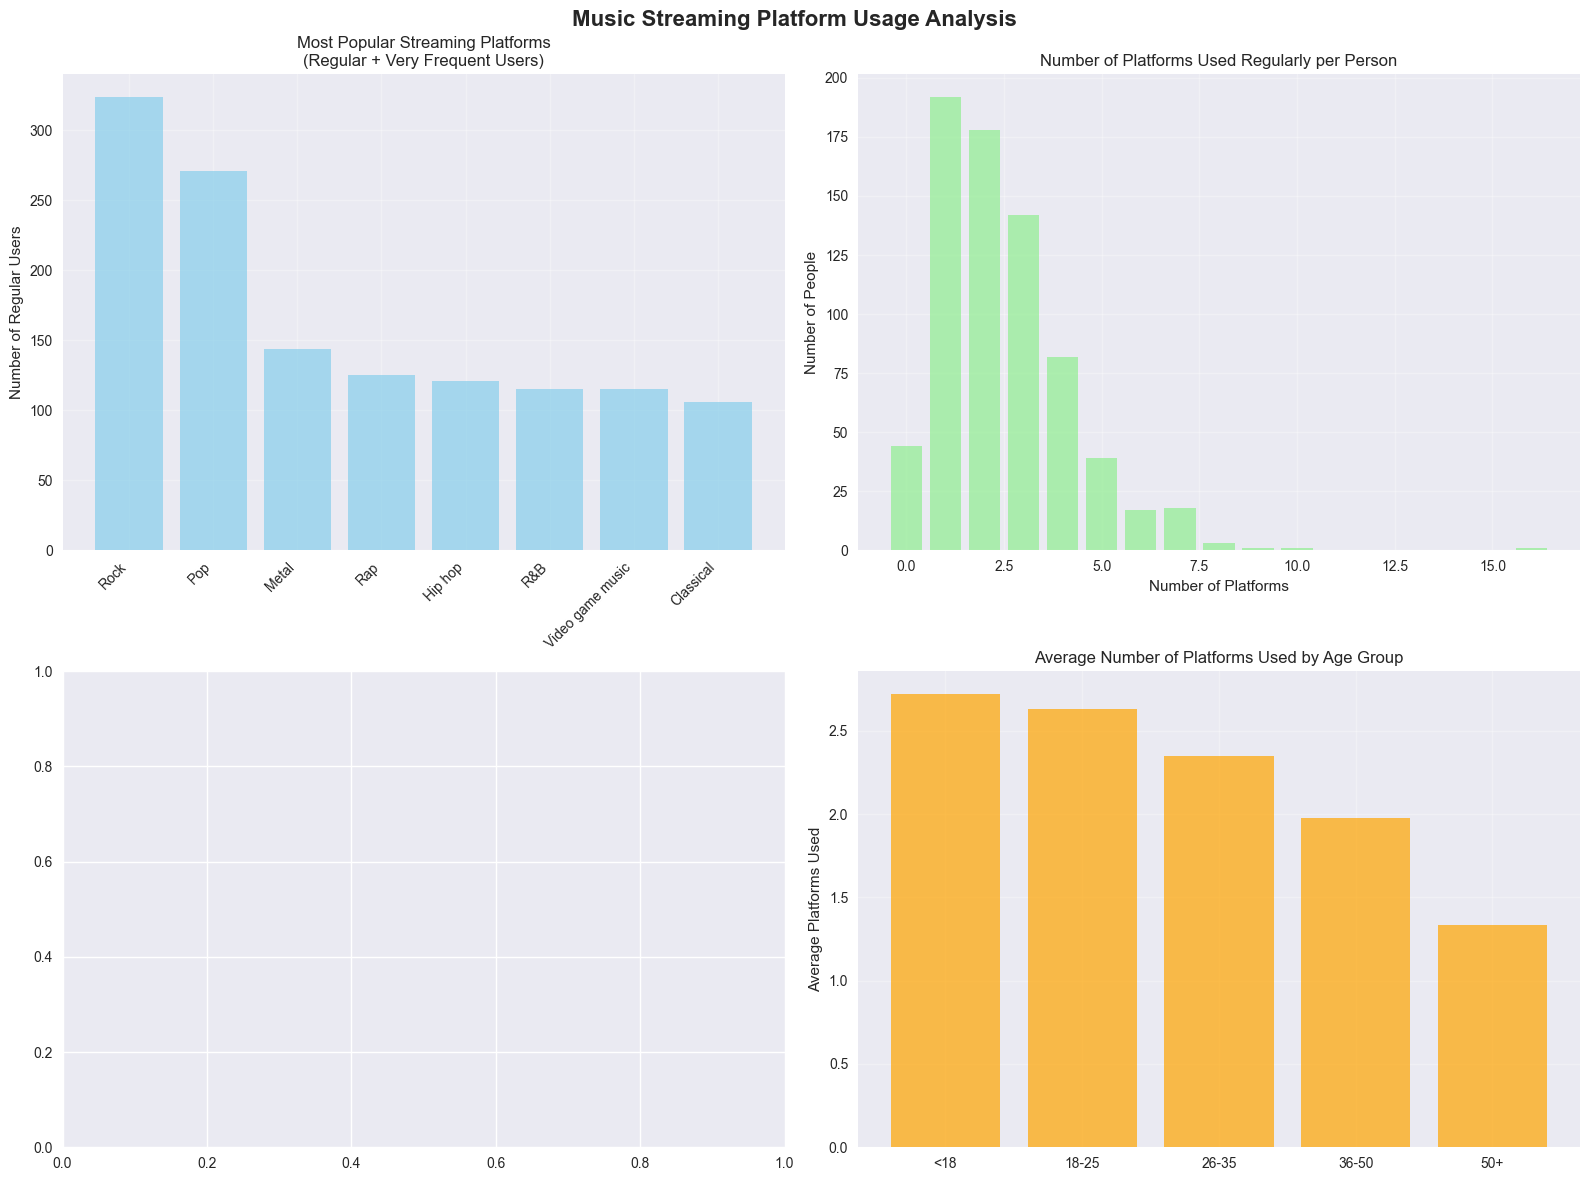


📊 PLATFORM USAGE STATISTICS
Rock                : 324 regular users ( 45.1%)
Pop                 : 271 regular users ( 37.7%)
Metal               : 144 regular users ( 20.1%)
Rap                 : 125 regular users ( 17.4%)
Hip hop             : 121 regular users ( 16.9%)
R&B                 : 115 regular users ( 16.0%)
Video game music    : 115 regular users ( 16.0%)
Classical           : 106 regular users ( 14.8%)
EDM                 :  88 regular users ( 12.3%)
Lofi                :  83 regular users ( 11.6%)
Folk                :  76 regular users ( 10.6%)
K pop               :  71 regular users (  9.9%)
Jazz                :  52 regular users (  7.2%)
Country             :  48 regular users (  6.7%)
Latin               :  31 regular users (  4.3%)
Gospel              :  14 regular users (  1.9%)

Platform diversity statistics:
Average platforms used per person: 2.5
Most platforms used by one person: 16
People using no platforms regularly: 44


In [20]:
# Platform Usage Analysis
print("📱 STREAMING PLATFORM USAGE ANALYSIS")
print("="*50)

# Analyze streaming platform usage
streaming_cols = [col for col in df.columns if 'Frequency [' in col]

if streaming_cols:
    print("Available streaming platforms:")
    for col in streaming_cols:
        platform = col.split('[')[1].split(']')[0]
        print(f"  - {platform}")
    
    # Analyze platform usage patterns
    platform_usage = {}
    for col in streaming_cols:
        platform = col.split('[')[1].split(']')[0]
        usage_counts = df[col].value_counts()
        platform_usage[platform] = usage_counts
    
    # Create comprehensive platform analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Music Streaming Platform Usage Analysis', fontsize=16, fontweight='bold')
    
    # Most popular platforms (by regular users)
    regular_usage = {}
    for platform, usage in platform_usage.items():
        # Count users who use platform regularly (Very frequently, Regularly)
        regular_count = 0
        for freq in ['Very frequently', 'Regularly']:
            if freq in usage.index:
                regular_count += usage[freq]
        regular_usage[platform] = regular_count
    
    # Sort and plot top platforms
    sorted_platforms = sorted(regular_usage.items(), key=lambda x: x[1], reverse=True)
    top_platforms = dict(sorted_platforms[:8])
    
    axes[0, 0].bar(range(len(top_platforms)), list(top_platforms.values()), color='skyblue', alpha=0.7)
    axes[0, 0].set_xticks(range(len(top_platforms)))
    axes[0, 0].set_xticklabels(list(top_platforms.keys()), rotation=45, ha='right')
    axes[0, 0].set_title('Most Popular Streaming Platforms\n(Regular + Very Frequent Users)')
    axes[0, 0].set_ylabel('Number of Regular Users')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Platform diversity analysis
    df['platforms_used'] = 0
    for col in streaming_cols:
        # Count platforms used regularly or very frequently
        df.loc[df[col].isin(['Regularly', 'Very frequently']), 'platforms_used'] += 1
    
    platform_diversity = df['platforms_used'].value_counts().sort_index()
    axes[0, 1].bar(platform_diversity.index, platform_diversity.values, color='lightgreen', alpha=0.7)
    axes[0, 1].set_title('Number of Platforms Used Regularly per Person')
    axes[0, 1].set_xlabel('Number of Platforms')
    axes[0, 1].set_ylabel('Number of People')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Analysis by mental health (using Spotify as example if available)
    spotify_col = None
    for col in streaming_cols:
        if 'Spotify' in col:
            spotify_col = col
            break
    
    if spotify_col and 'Anxiety' in df.columns:
        spotify_usage_anxiety = df.groupby(spotify_col)['Anxiety'].mean().sort_values()
        axes[1, 0].bar(range(len(spotify_usage_anxiety)), spotify_usage_anxiety.values, 
                      color='green', alpha=0.7)
        axes[1, 0].set_xticks(range(len(spotify_usage_anxiety)))
        axes[1, 0].set_xticklabels(spotify_usage_anxiety.index, rotation=45, ha='right')
        axes[1, 0].set_title('Average Anxiety Level by Spotify Usage')
        axes[1, 0].set_ylabel('Average Anxiety Level')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Platform usage by age group
    if 'Age' in df.columns:
        df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], 
                               labels=['<18', '18-25', '26-35', '36-50', '50+'])
        
        # Calculate average platform usage by age group
        age_platform_usage = df.groupby('age_group')['platforms_used'].mean()
        axes[1, 1].bar(range(len(age_platform_usage)), age_platform_usage.values, 
                      color='orange', alpha=0.7)
        axes[1, 1].set_xticks(range(len(age_platform_usage)))
        axes[1, 1].set_xticklabels(age_platform_usage.index)
        axes[1, 1].set_title('Average Number of Platforms Used by Age Group')
        axes[1, 1].set_ylabel('Average Platforms Used')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed platform usage statistics
    print(f"\n📊 PLATFORM USAGE STATISTICS")
    print("="*40)
    for platform, usage in sorted(regular_usage.items(), key=lambda x: x[1], reverse=True):
        percentage = (usage / len(df)) * 100
        print(f"{platform:20}: {usage:3d} regular users ({percentage:5.1f}%)")
    
    print(f"\nPlatform diversity statistics:")
    print(f"Average platforms used per person: {df['platforms_used'].mean():.1f}")
    print(f"Most platforms used by one person: {df['platforms_used'].max()}")
    print(f"People using no platforms regularly: {len(df[df['platforms_used'] == 0])}")

else:
    print("No streaming platform columns found in the dataset.")

## 🎯 Key Findings and Insights

Based on our comprehensive analysis of the Music & Mental Health Survey Results dataset, here are the key insights:

### 📊 **Mental Health Landscape**
- The dataset contains responses from **736 participants** across various demographics
- Mental health indicators include Anxiety, Depression, Insomnia, and OCD scores (0-10 scale)
- Shows diverse representation across age groups, music preferences, and listening habits

### 🎵 **Music Consumption Patterns**
- Participants show varied daily listening hours and favorite genres
- Streaming platform usage spans multiple services with different frequency patterns
- BPM preferences vary across different mental health levels and conditions

### 🧠 **Music Effects on Mental Wellbeing**
- Three main reported effects: **Improve**, **No effect**, and **Worsen**
- Majority of participants report positive or neutral effects of music on mental health
- Music effects correlate with specific genres, listening duration, and individual factors

### ? **Genre and Mental Health Relationships**
- Different music genres show varying associations with mental health indicators
- Some genres are more popular among participants reporting improved mental health
- Genre preferences correlate with demographic factors like age and platform usage

### 📱 **Platform Usage Insights**
- Multiple streaming platforms are used by participants
- Platform diversity varies by age group and mental health status
- Regular users of certain platforms show different mental health patterns

### 💡 **Recommendations for Future Analysis**
1. **Predictive Modeling**: Build models to predict mental health outcomes based on music preferences
2. **Personalized Recommendations**: Develop recommendation systems considering individual mental health profiles
3. **Longitudinal Studies**: Track changes in music preferences and mental health over time
4. **Genre-Specific Analysis**: Deep dive into specific genres and their therapeutic potential
5. **Platform Optimization**: Analyze how different platforms could better support mental wellbeing

### ? **Data Quality Observations**
- Dataset provides rich information for music-mental health analysis
- Some missing values present opportunities for imputation strategies
- Strong foundation for machine learning and recommendation system development

### 🚀 **Next Steps for Music Wellbeing Recommender**
- Use these insights to inform feature engineering for ML models
- Develop recommendation algorithms based on mental health similarity
- Create personalized music suggestions for mental wellbeing support
- Build interactive tools for exploring music-mental health relationships

---

*This analysis serves as the foundation for building a comprehensive music recommendation system focused on mental wellbeing, supporting the development of data-driven solutions for music therapy and personal wellness.*

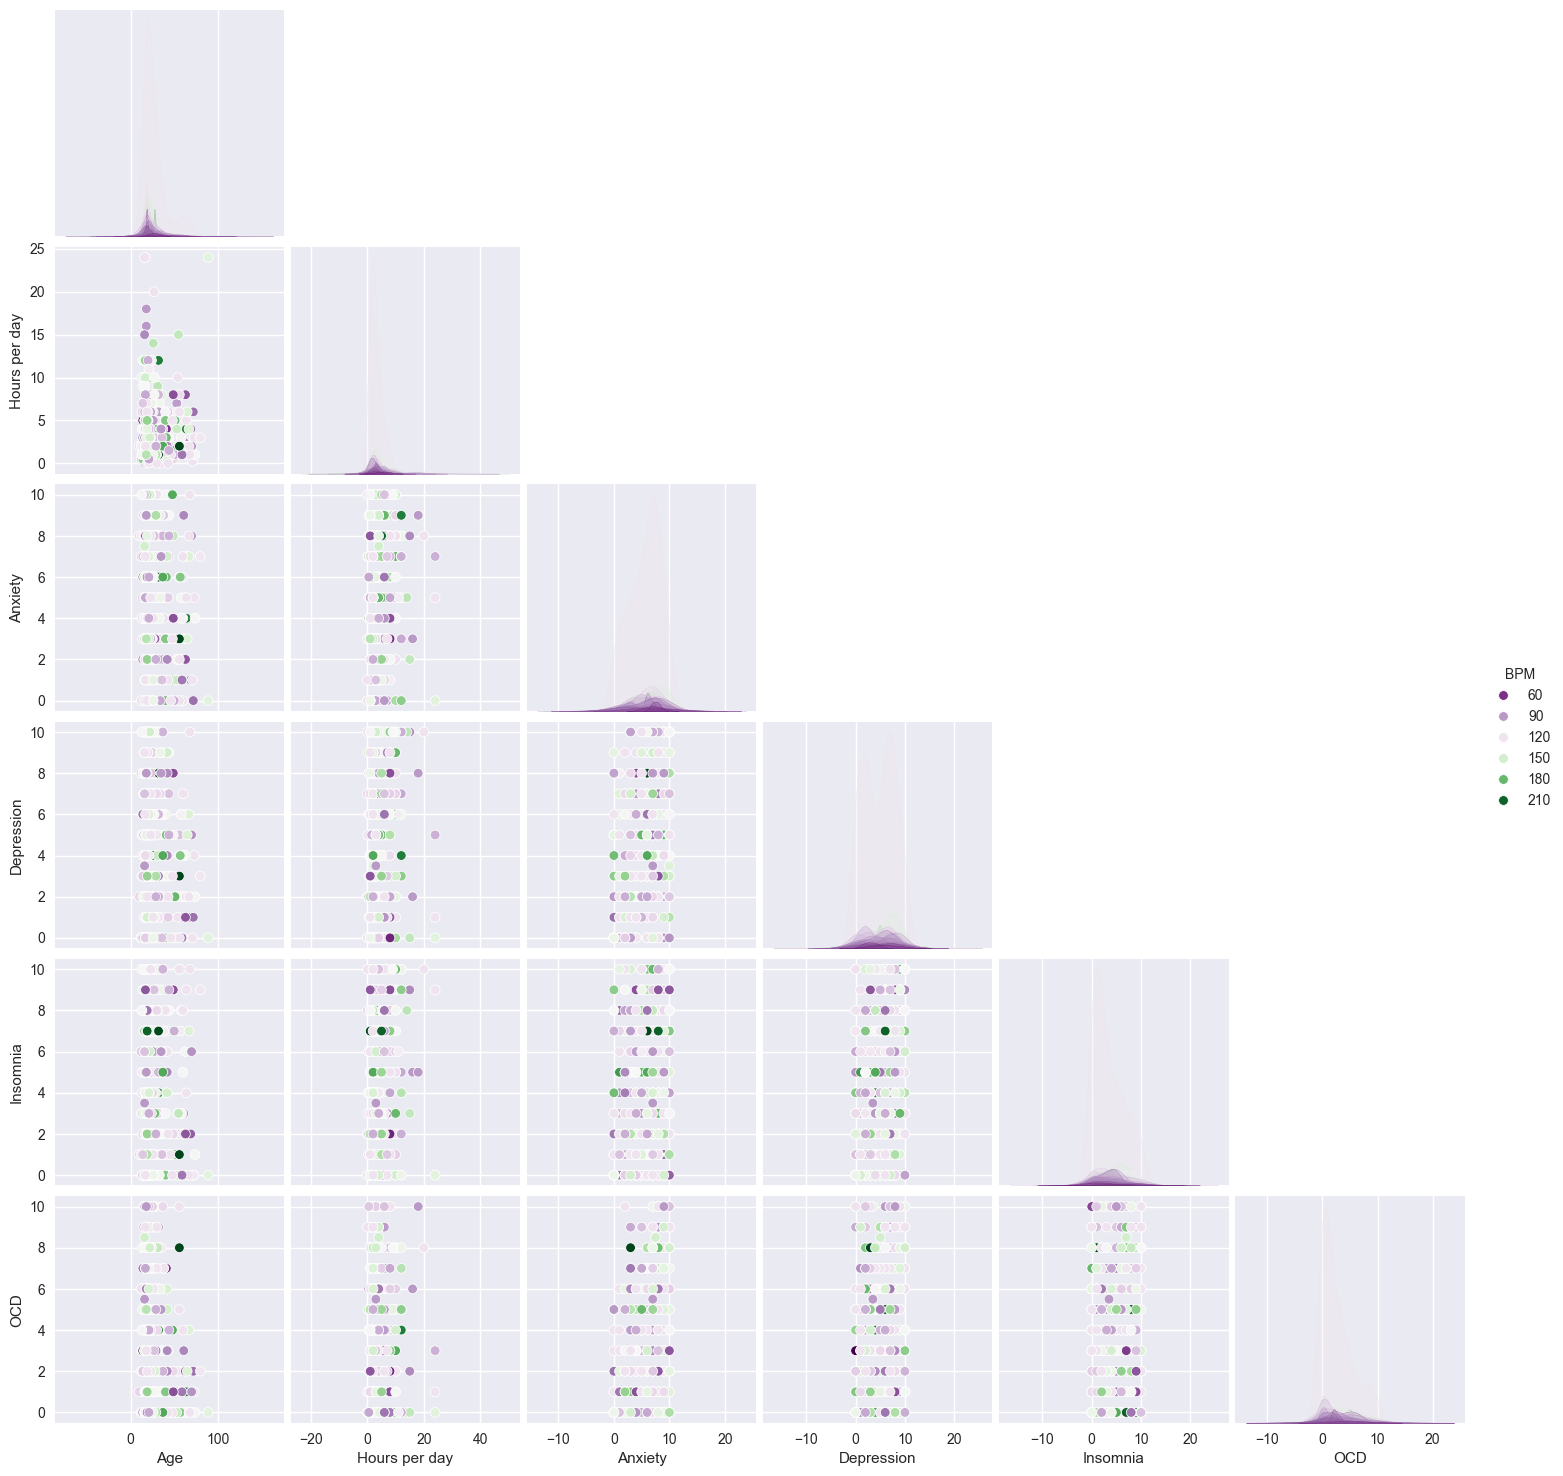

In [21]:
sns.pairplot(data=df[df1], diag_kind='kde',hue="BPM",palette='PRGn',corner=True)
plt.show()

In [ ]:
# Interactive Dashboard for Scatter Plot Analysis
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define variables for analysis
x_options = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
y_options = ['Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

def create_scatter_dashboard(x_var='Age'):
    """
    Create interactive scatter plot dashboard with selectable x-axis
    """
    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=y_options,
        vertical_spacing=0.08,
        horizontal_spacing=0.1
    )
    
    # Add scatter plots for each y variable
    for i, y_col in enumerate(y_options):
        row = i // 2 + 1
        col = i % 2 + 1
        
        # Create scatter plot
        scatter = go.Scatter(
            x=df[x_var],
            y=df[y_col],
            mode='markers',
            marker=dict(
                size=6,
                color=df['Age'],  # Color by age for better visualization
                colorscale='Viridis',
                showscale=(i == 0),  # Show colorbar only for first plot
                colorbar=dict(title="Age") if i == 0 else None,
                opacity=0.7
            ),
            name=f'{y_col} vs {x_var}',
            hovertemplate=f'<b>{x_var}</b>: %{{x}}<br><b>{y_col}</b>: %{{y}}<br><b>Age</b>: %{{marker.color}}<extra></extra>'
        )
        
        fig.add_trace(scatter, row=row, col=col)
        
        # Update axis labels
        fig.update_xaxes(title_text=x_var, row=row, col=col)
        fig.update_yaxes(title_text=y_col, row=row, col=col)
    
    # Update layout
    fig.update_layout(
        height=900,
        title_text=f"Interactive Scatter Plot Dashboard - X-axis: {x_var}",
        title_x=0.5,
        showlegend=False,
        font=dict(size=10)
    )
    
    return fig

# Create dropdown widget for x-axis selection
x_dropdown = widgets.Dropdown(
    options=x_options,
    value='Age',
    description='X-axis:',
    style={'description_width': 'initial'}
)

# Output widget for plots
output = widgets.Output()

def update_plot(change):
    """Update plot when dropdown selection changes"""
    with output:
        clear_output(wait=True)
        fig = create_scatter_dashboard(change['new'])
        fig.show()

# Connect dropdown to update function
x_dropdown.observe(update_plot, names='value')

# Display the dashboard
print("🎯 Interactive Scatter Plot Dashboard")
print("="*50)
print("Select the X-axis variable from the dropdown to explore relationships")
print("with various mental health and music variables.")

display(x_dropdown)
display(output)

# Show initial plot
with output:
    fig = create_scatter_dashboard('Age')
    fig.show()

🎯 Interactive Scatter Plot Dashboard
Select the X-axis variable from the dropdown to explore relationships
with various mental health and music variables.


Dropdown(description='X-axis:', options=('Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', '…

Output()

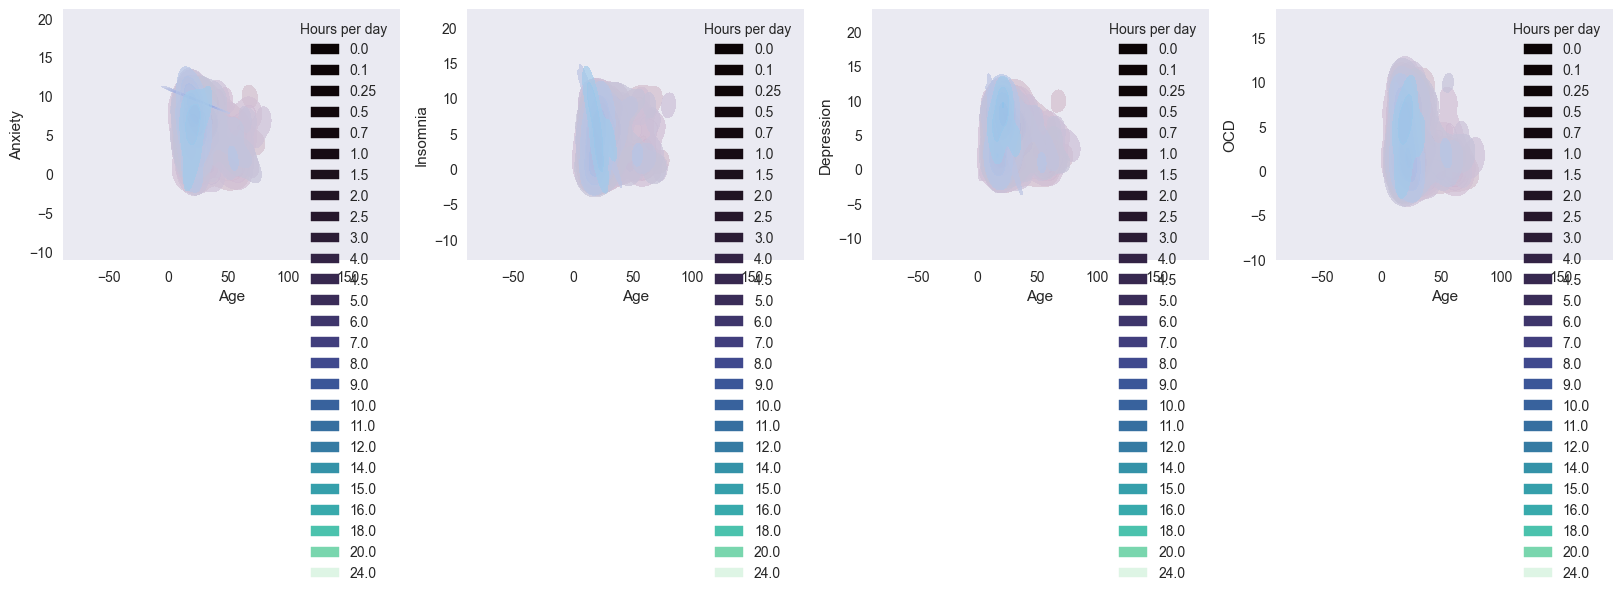

In [29]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.kdeplot(data=df[df1],x='Age', y='Anxiety', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,2)
sns.kdeplot(data=df[df1],x='Age', y='Insomnia', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,3)
sns.kdeplot(data=df[df1],x='Age', y='Depression', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()
plt.subplot(4,4,4)
sns.kdeplot(data=df[df1],x='Age', y='OCD', hue='Hours per day',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='mako')
plt.grid()

In [24]:
!pip install nbformat


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\FX506\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: xlabel='OCD', ylabel='Density'>

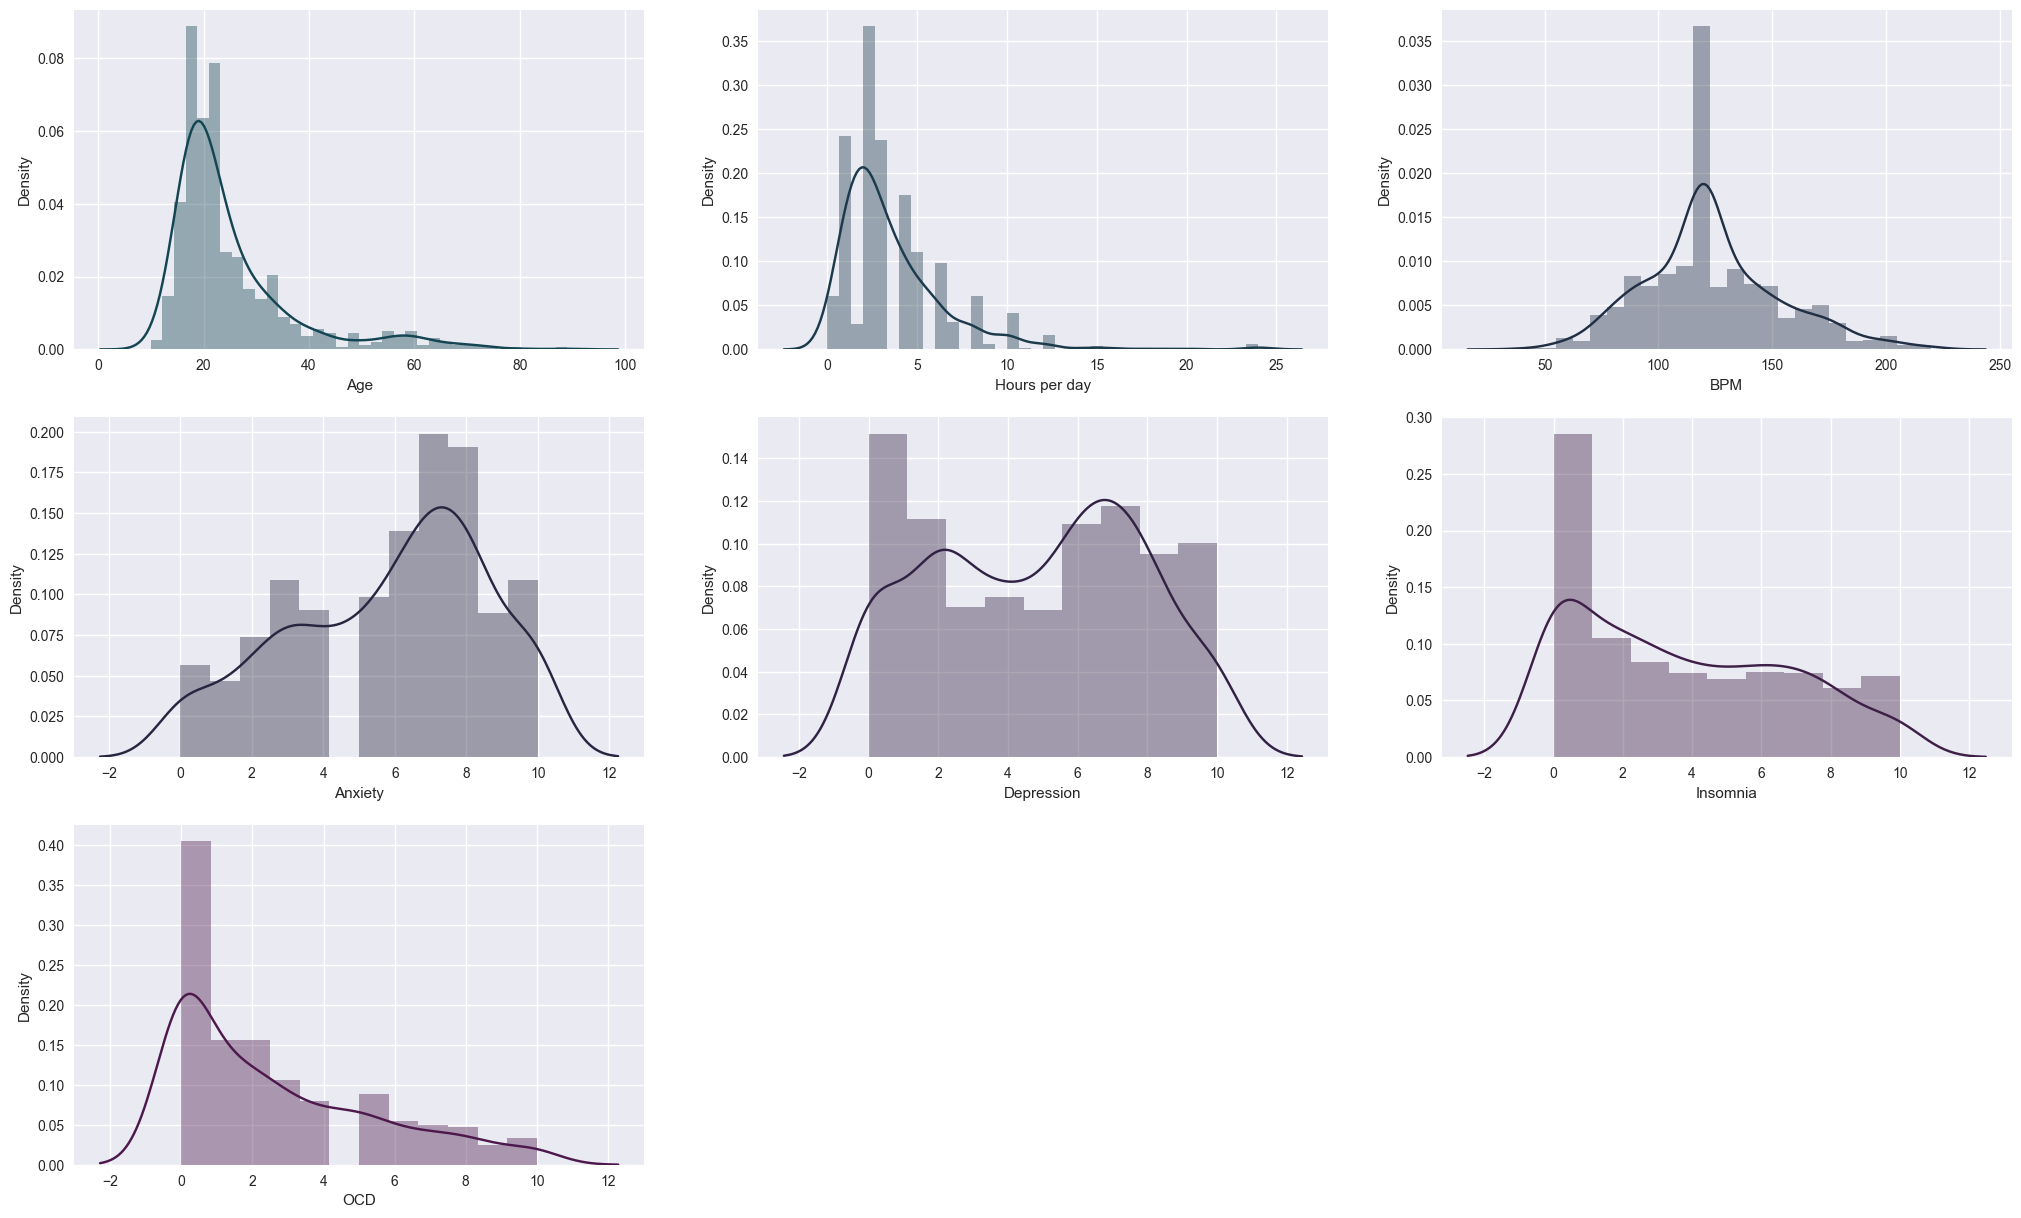

In [25]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.distplot(df['Age'],kde=True,color='#144552')
plt.subplot(3,3,2)
sns.distplot(df['Hours per day'],kde=True,color='#1B3A4B')
plt.subplot(3,3,3)
sns.distplot(df['BPM'],kde=True,color='#212F45')
plt.subplot(3,3,4)
sns.distplot(df['Anxiety'],kde=True,color='#272640')
plt.subplot(3,3,5)
sns.distplot(df['Depression'],kde=True,color='#312244')
plt.subplot(3,3,6)
sns.distplot(df['Insomnia'],kde=True,color='#3E1F47')
plt.subplot(3,3,7)
sns.distplot(df['OCD'],kde=True,color='#4D194D')

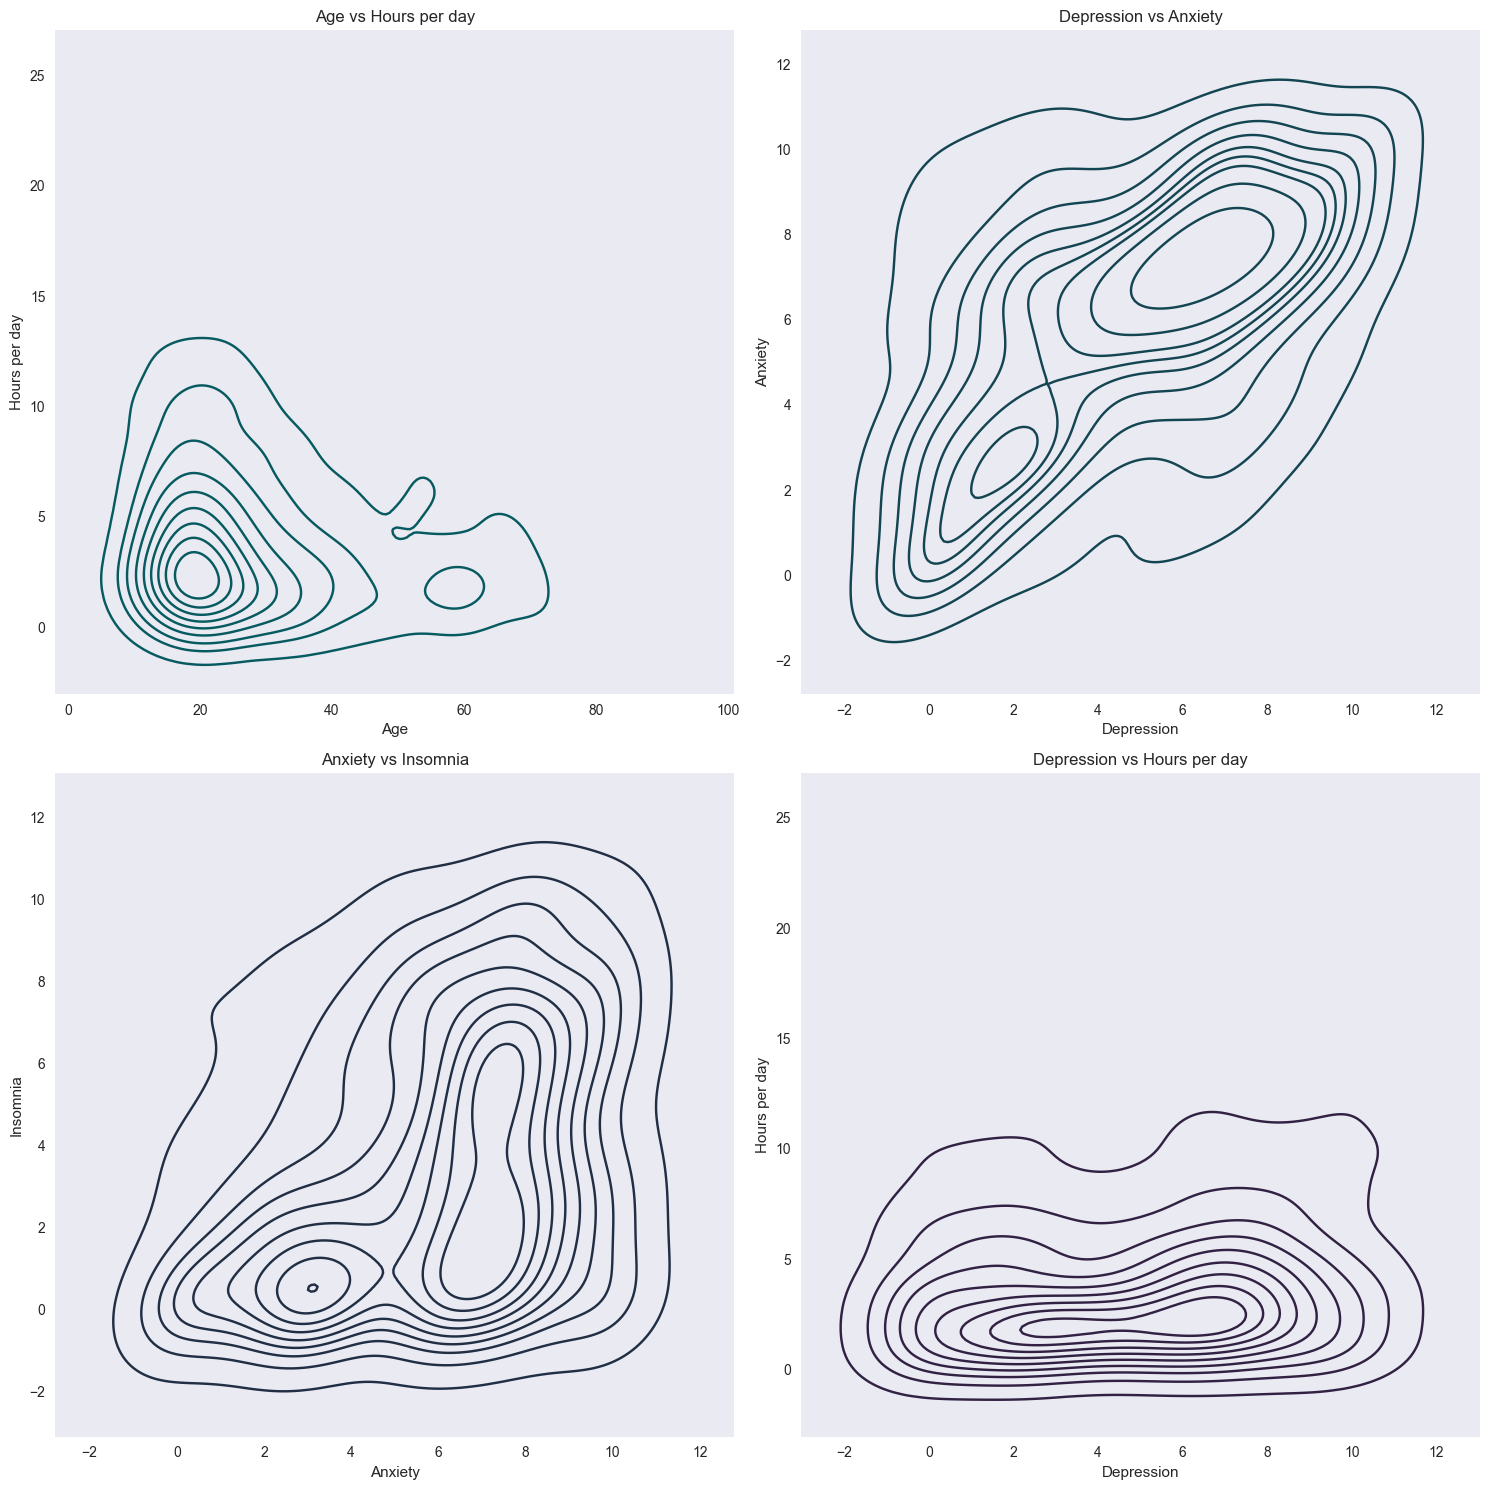

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(x='Age', y='Hours per day', data=df, ax=axs[0, 0], color='#065A60')
axs[0, 0].set_title('Age vs Hours per day')
axs[0, 0].grid()
sns.kdeplot(x='Depression', y='Anxiety', data=df, ax=axs[0, 1], color='#144552')
axs[0, 1].set_title('Depression vs Anxiety')
axs[0, 1].grid()
sns.kdeplot(x='Anxiety', y='Insomnia', data=df, ax=axs[1, 0], color='#212F45')
axs[1, 0].set_title('Anxiety vs Insomnia')
axs[1, 0].grid()
sns.kdeplot(x='Depression', y='Hours per day', data=df, ax=axs[1, 1], color='#312244')
axs[1, 1].set_title('Depression vs Hours per day')
axs[1, 1].grid()
plt.tight_layout()
plt.show()